[View in Colaboratory](https://colab.research.google.com/github/YaminiMuralidharen/MachineLearningexercises/blob/master/LogisticRegression.ipynb)

In [6]:
from google.colab import files
uploaded = files.upload()

Saving ChurnData.csv to ChurnData.csv


In [7]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head(10)



,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0


In [8]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df.shape


(200, 10)

In [9]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [10]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1., 1., 0., 0., 0.])

In [11]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0.])

In [15]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


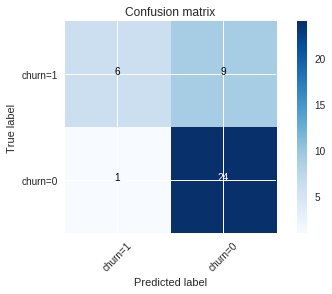

In [17]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')


. The first row is for customers whose actual churn value in test set is 1. As you can calculate, out of 40 customers, the churn value of 15 of them is 1. And out of these 15, the classifier correctly predicted 6 of them as 1, and 9 of them as 0.

It means, for 6 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 9 customers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row.

For  the customers with churn value 0 in the second row. It looks like there were 25 customers whom their churn value were 0.

The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes. In specific case of binary classifier, such as this example, we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.

In [18]:
print (classification_report(y_test, yhat))

             precision    recall  f1-score   support

        0.0       0.73      0.96      0.83        25
        1.0       0.86      0.40      0.55        15

avg / total       0.78      0.75      0.72        40



In [19]:
#log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185

In [20]:
# Stochastic Average Gradient  SAG

LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_pred = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_pred))

LogLoss: : 0.61


Log loss is higher when we use Stochastice average gradient as regularization


In [23]:

#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,yhat) #y_target, y_pred

0.25

In [25]:

# MSE L2 loss - Should be close to 0
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,yhat) #y_target, y_pred

0.25

In [27]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,yhat)*100)

Accuracy :  75.0
